# Preprocessing of the image

In [2]:
from numpy import *
import math
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#Canny Edge Detection START

img = cv.imread('assets/mickey2.png', 0)
edges = cv.Canny(img,100,100)  #If we decrease any threshold more detailed image

# Skip every n-th point along the edges
n = 10
reduced_edges2 = np.zeros_like(edges)
for row in range(edges.shape[0]):
    reduced_edges2[row, np.arange(0, edges.shape[1], n)] = edges[row, np.arange(0, edges.shape[1], n)]

# plt.subplot(131),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(132),plt.imshow(edges,cmap = 'gray')
# plt.title('Edges'), plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(reduced_edges2,cmap = 'gray')
# plt.title(f'Edges Reduced by {n} p'), plt.xticks([]), plt.yticks([])
# plt.show()


#Canny Edge Detection END

a1 = 0  # length of link a1 in cm #AKINITO agnoiste to-oti timi ke na tu valoume den allazei to apotelesma
a2 = 13 # length of link a2 in cm # 1o link
a3 = 0  # length of link a3 in cm #Den exume 3o link emeis opote giafto eine 0
a4 = 15.5 # length of link a4 in cm #2o link



l=math.cos(math.pi/4)*(a2+a4) #h kolla mas eine l*l

m1=len(reduced_edges2) #diastaseis tou reduced_edges2 x-axis
m2=len(reduced_edges2[0]) #diastaseis tou reduced_edges2 y-axis
#scale stis diastaseis tin kollas mas
if m1>m2:
    l1=l
    l2=l*m2/m1 
else:
    l2=l
    l1=l*m1/m2



y_axis_lambda=l2/len(reduced_edges2) 
x_axis_lambda=l1/len(reduced_edges2[0])

x_points=[]
y_points=[]
for i in range(len(reduced_edges2)):
    for j in range(len(reduced_edges2[0])):
        if reduced_edges2[i][j]==255:
            x_points.append(l1-j*x_axis_lambda)
            y_points.append(l2-i*y_axis_lambda)

# Desired Position of End effector
x = [-k for k in x_points] #because our Xs are negative
y = y_points

theta_1 = []
theta_2 = []
thetas = []
for i in range(len(x)):
    # Equations for Inverse kinematics
    r1 = sqrt(x[i]**2+y[i]**2)  # eqn 1
    phi_1 = arccos((a4**2-a2**2-r1**2)/(-2*a2*r1))  # eqn 2
    phi_2 = arctan2(y[i], x[i])  # eqn 3
    theta_1.append(rad2deg(phi_2-phi_1))  # eqn 4 converted to degrees

    phi_3 = arccos((r1**2-a2**2-a4**2)/(-2*a2*a4))
    theta_2.append(180-rad2deg(phi_3))
    if not np.isnan(theta_1[i]) and not np.isnan(theta_2[i]):
        # thetas.append((theta_1, theta_2))
        thetas.append((theta_1[i], theta_2[i]))
# print('theta one: ', theta_1) #servo 1
# print('theta two: ', theta_2) #servo 2




ModuleNotFoundError: No module named 'numpy'

In [ ]:
#write txt file for theta_1 values (servo 1)
with open(r'theta_1.txt', 'w') as fp:
    for item in theta_1:
        # write each item on a new line
        fp.write("%s\n" % item)
fp.close()

#write txt file for theta_2 values(servo 2)
with open(r'theta_2.txt', 'w') as fp2:
    for item2 in theta_2:
        # write each item on a new line
        fp2.write("%s\n" % item2)
fp2.close()
with open(r'thetas.txt', 'w') as fp3:
    for item3 in thetas:
        # write each item on a new line
        fp3.write(f"{item3[0]} {item3[1]}\n")

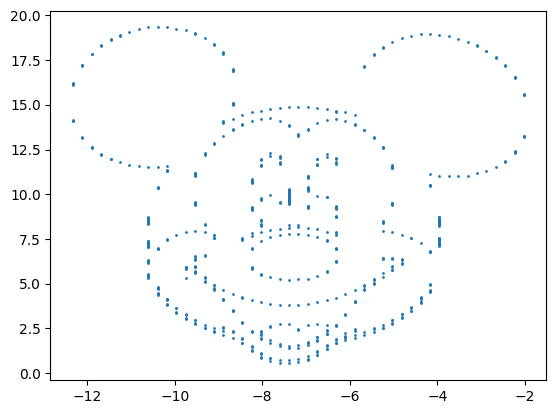

In [24]:
plt.scatter(x, y, s=1)

# Servos Calibration

In [25]:
!ls /dev/ttyACM*

/dev/ttyACM1


In [27]:
import pyfirmata
from time import sleep

board = pyfirmata.Arduino('/dev/ttyACM1')

it = pyfirmata.util.Iterator(board)

# input('Press ENTER to start the servo motor, be careful!')

it.start()

# Define pins
pin0 = board.get_pin('d:10:s')
pin1 = board.get_pin('d:12:s')
pin2 = board.get_pin('d:7:s')

# pin0.write(90)
# sleep(3)
# pin1.write(180-90)
# sleep(3)
# pin2.write(90)

## Set the two servos to 90 degrees and then attach the link

In [28]:
pin0.write(90)

In [35]:
pin1.write(180-90)

## Pen shouldn't touch the paper

In [34]:
pin2.write(60)

## Pen should touch the paper

In [30]:
pin2.write(80)

# Processing the theta values, make them int and remove the duplicates

In [32]:
int_thetas = [(round(theta_pair[0]), round(theta_pair[1])) for theta_pair in thetas]
unique_thetas = []

for theta in int_thetas:
    if theta not in unique_thetas:
        unique_thetas.append(theta)

In [ ]:
with open(r'int_thetas.txt', 'w') as fp3:
    for item3 in int_thetas:
        # write each item on a new line
        fp3.write(f"{item3[0]} {item3[1]}\n")

with open(r'unique_thetas.txt', 'w') as fp3:
    for item3 in unique_thetas:
        # write each item on a new line
        fp3.write(f"{item3[0]} {item3[1]}\n")

# Start Plotting

In [ ]:
cnt = 0
for (theta1, theta2) in unique_thetas:
    
    pin0.write(theta1)
    sleep(1)
    pin1.write(180-theta2)
    sleep(2)
    # pen down
    pin2.write(80)
    sleep(2)
    # pen up
    pin2.write(60)
    sleep(2)
    cnt += 1
    if cnt % 10 == 0:
        print(f'Finished {cnt} points')
#     # input('Press ENTER to continue')
sleep(1)
pin0.write(70)
sleep(1)
pin1.write(180-40)
